<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/104_DOE_PDivididas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DOE - Diseño en parcelas divididas con notas del Texto Análisis y diseño de experimentos de  Humberto Gutiérrez Pulido y Román de la Vara Salazar - Editorial McGraw-Hill. Segunda Edición**

# **1. La Parte Conceptuual del Diseño**

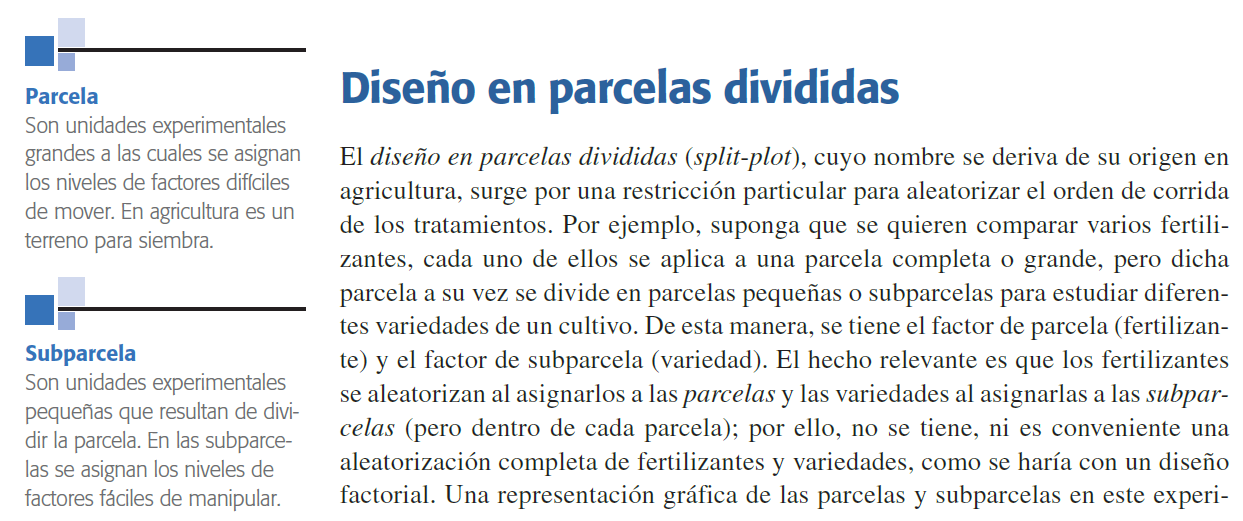

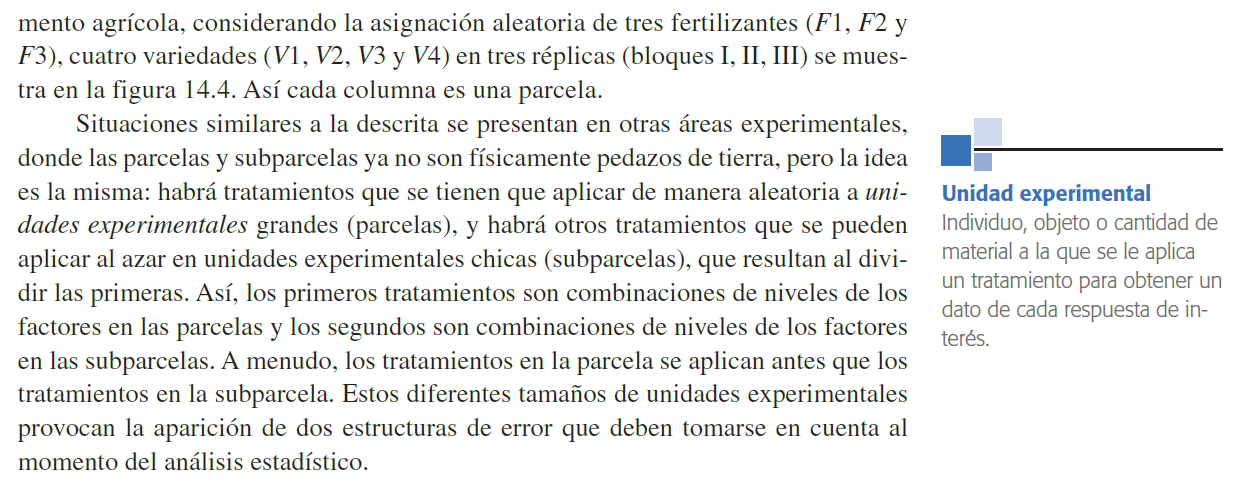

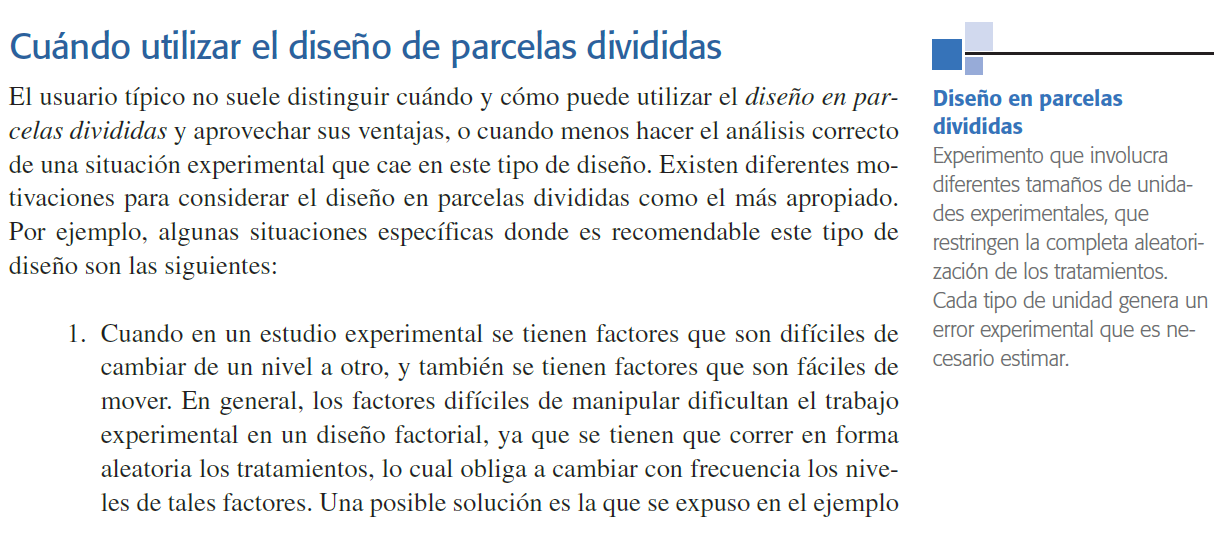

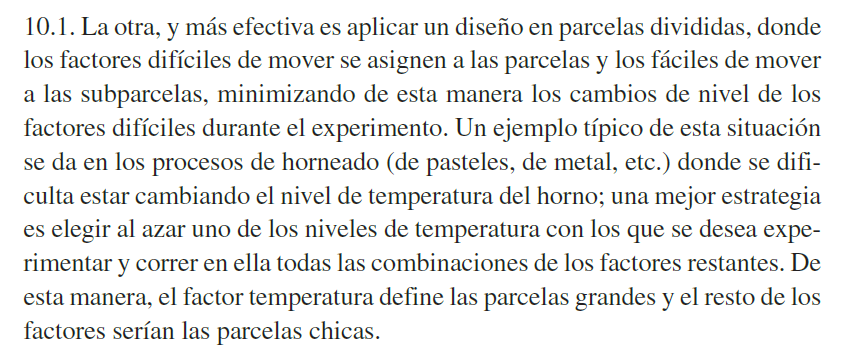

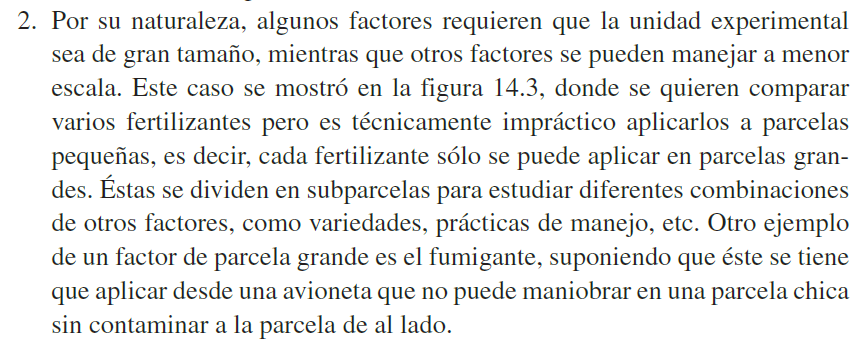

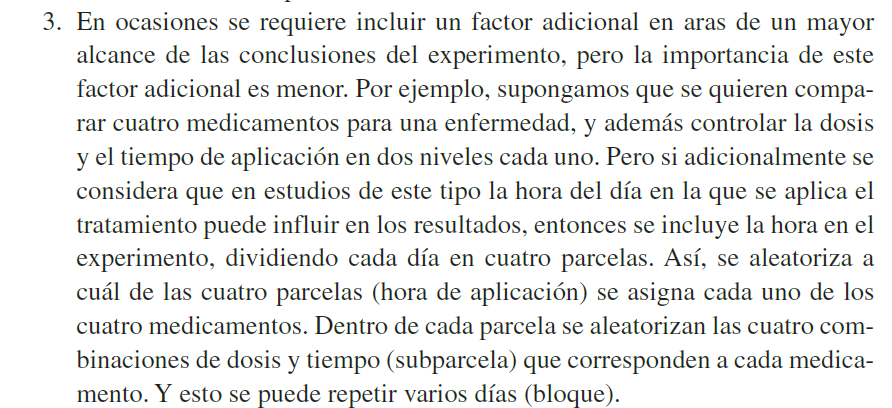

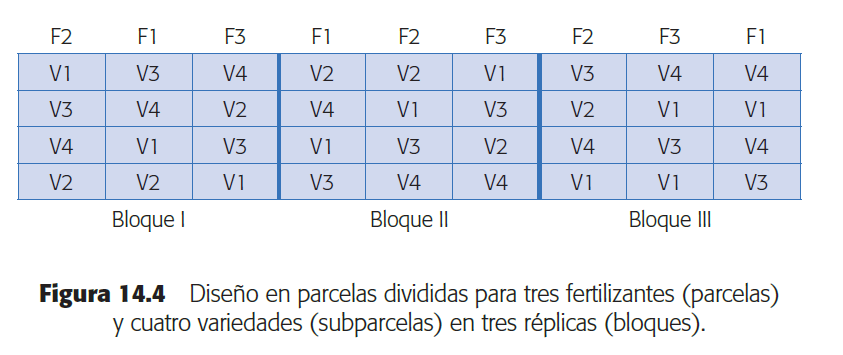

# **2. El Ejemplo ilustrativos de Parcelas Divididas**

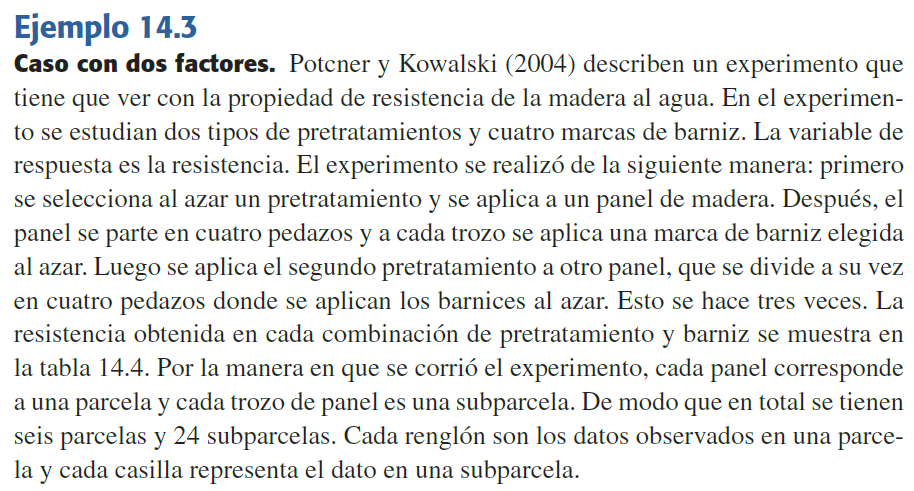

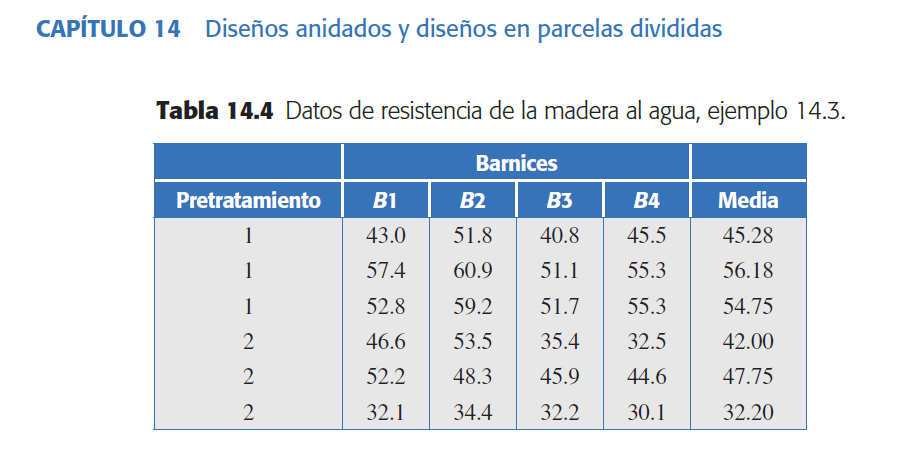

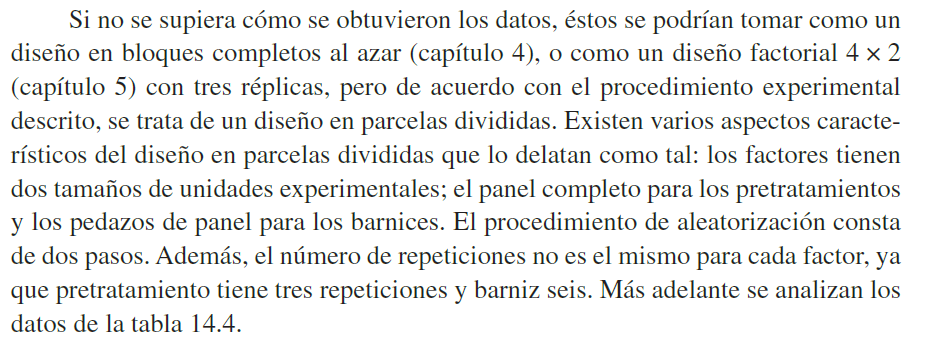

# **3. Las librerias de uso comun**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import matplotlib.pyplot as plt


# **4. Ingresando los datos para el Análisis - Creamos dos DataFrame**

## **a. DataFrame para las SubParcelas**

In [ ]:
# Crear un DataFrame simulado
data1 = pd.DataFrame({
    'Pretratamiento1': ['A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1', 'A1',
                       'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2', 'A2'],
    'Barnices': ['B1', 'B2', 'B3', 'B4', 'B1', 'B2', 'B3', 'B4','B1', 'B2', 'B3', 'B4',
                 'B1', 'B2', 'B3', 'B4', 'B1', 'B2', 'B3', 'B4','B1', 'B2', 'B3', 'B4'],
    'Resistencia': [43, 51.8, 40.8, 45.5, 57.4, 60.9, 51.1, 55.3, 52.8, 59.2, 51.7, 55.3,
                    46.6, 53.5, 35.4, 32.5, 52.2, 48.3, 45.9, 44.6, 32.1, 34.4, 32.2, 30.1]
})
print(data1)

## **b. DataFrame para las Parcelas**

In [26]:

data2 = pd.DataFrame({
    'Pretratamiento2': ['A1', 'A1', 'A1', 'A2', 'A2', 'A2'],
    'Media': [45.28, 56.18, 54.75, 42, 47.75, 32.2]
})
print(data2)

  Pretratamiento2  Media
0              A1  45.28
1              A1  56.18
2              A1  54.75
3              A2  42.00
4              A2  47.75
5              A2  32.20


# **5. Hacemos el Analisis para las Parcelas**
## **a. como si fuese un DCA**

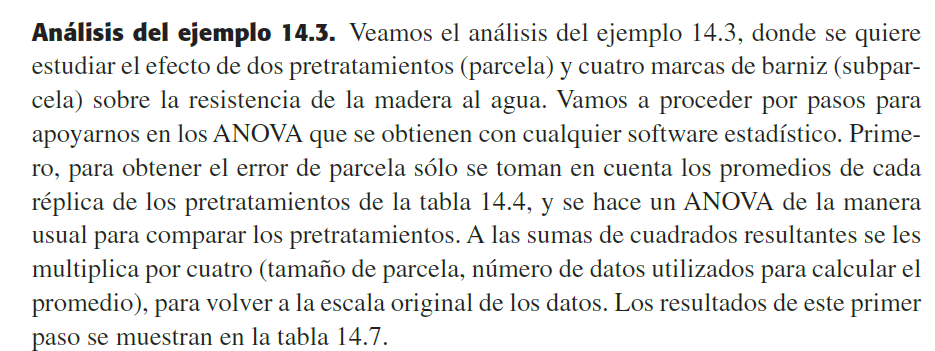

In [16]:
# Ajustar un modelo lineal con efectos principales y de interacción
modelo2 = smf.ols('Media ~ Pretratamiento2', data=data2).fit()

# Realizar un ANOVA
anova_table2 = sm.stats.anova_lm(modelo2, typ=1)

# Imprimir la tabla ANOVA
print("Tabla ANOVA:")
print(anova_table2)



Tabla ANOVA:
                  df    sum_sq   mean_sq         F    PR(>F)
Pretratamiento2  1.0  195.6246  195.6246  4.037376  0.114888
Residual         4.0  193.8136   48.4534       NaN       NaN


## **b. Corregimos la variabilidad de la Fuente**

In [13]:
# Tabla Resumen
#!pip install texttable &>/dev/null
from texttable import Texttable
## **e. El Valor p para cada prueba del Anova**
from scipy import stats
F = stats.f(1,4)

valor_p1 = 1 - F.cdf(4.037)
t1 = Texttable()
t1.add_rows([['Fuente','4*SC','gl', 'CM', 'F', 'valor_p' ],
           ['Pretratamiento',	782.4984, 1,	782.4984, 4.037,valor_p1 ],
           ['Error(parcela)',	775.2544, 4,	193.8136, '','']])
print(t1.draw())

+----------------+---------+----+---------+-------+---------+
|     Fuente     |  4*SC   | gl |   CM    |   F   | valor_p |
+================+=========+====+=========+=======+=========+
| Pretratamiento | 782.498 | 1  | 782.498 | 4.037 | 0.115   |
+----------------+---------+----+---------+-------+---------+
| Error(parcela) | 775.254 | 4  | 193.814 |       |         |
+----------------+---------+----+---------+-------+---------+


# **6. Hacemos el Analisis para las Subparcelas**
## **a. como si fuese un Diseño de dos factores $2x4$**

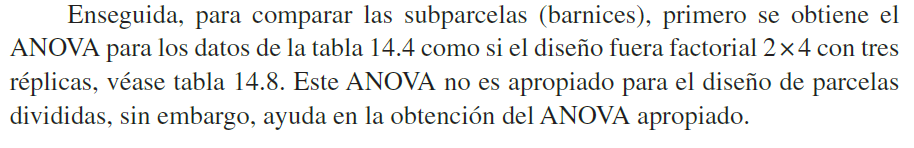

In [17]:
# Ajustar un modelo lineal con efectos principales y de interacción
modelo1 = smf.ols('Resistencia ~ Pretratamiento1*Barnices', data=data1).fit()

# Realizar un ANOVA
anova_table1 = sm.stats.anova_lm(modelo1, typ=1)

# Imprimir la tabla ANOVA
print("Tabla ANOVA:")
print(anova_table1)



Tabla ANOVA:
                            df      sum_sq     mean_sq          F    PR(>F)
Pretratamiento1            1.0  782.041667  782.041667  13.485221  0.002060
Barnices                   3.0  266.005000   88.668333   1.528962  0.245383
Pretratamiento1:Barnices   3.0   62.791667   20.930556   0.360918  0.782043
Residual                  16.0  927.880000   57.992500        NaN       NaN


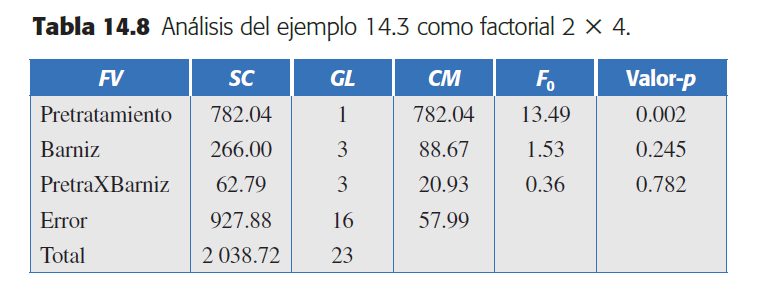

## **b. Corregimos la variabilidad de la Fuente subparcela**

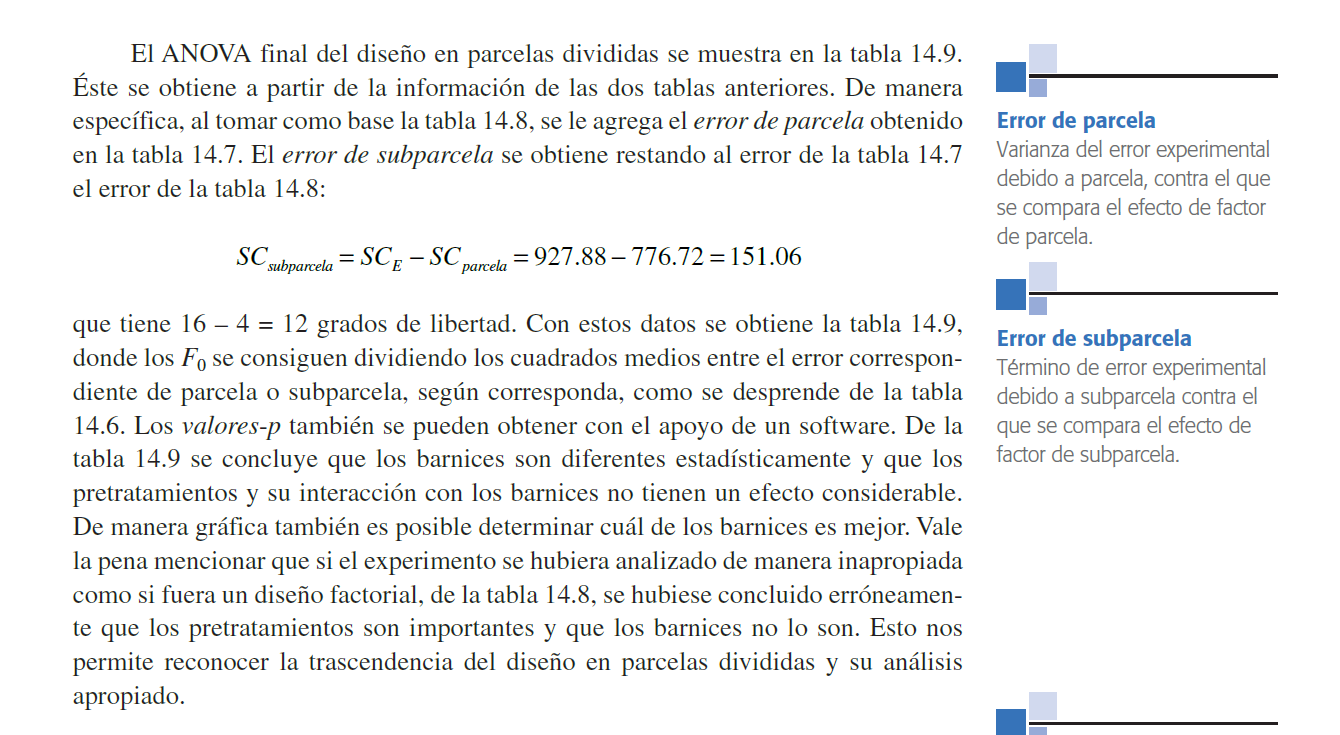

## **c. Construimos la nueva ANOVA mezclando las Parcelas con las SubParcelas**

In [24]:
#Tabla ANOVA:
t2 = Texttable()
t2.add_rows([['LOTE', 'Fuente','gl','SC', 'CM', 'F', 'valor_p'],
    ['Parcela', 'Pretratamiento1', 1.0,  782.4984, 782.4984, 4.037,0.1353],
    ['', 'Error(parcela)', 4,	775.2544, 	193.8136, '',''],
['Subparcela', 'Barnices',  3, 266.005000,   88.668333,   7.04,  0.0054],
['', 'Pretratamiento1:Barnices',   3.0,   62.791667,   20.930556,   1.66,  0.228],
['', 'Error(subparcela)',  12,  151.06,   12.59,        '',  ''],
['', 'Total', 23, 2038.61, '', '', '' ]])
print(t2.draw())

+------------+---------------------+----+----------+---------+-------+---------+
|    LOTE    |       Fuente        | gl |    SC    |   CM    |   F   | valor_p |
+============+=====================+====+==========+=========+=======+=========+
| Parcela    | Pretratamiento1     | 1  | 782.498  | 782.498 | 4.037 | 0.135   |
+------------+---------------------+----+----------+---------+-------+---------+
|            | Error(parcela)      | 4  | 775.254  | 193.814 |       |         |
+------------+---------------------+----+----------+---------+-------+---------+
| Subparcela | Barnices            | 3  | 266.005  | 88.668  | 7.040 | 0.005   |
+------------+---------------------+----+----------+---------+-------+---------+
|            | Pretratamiento1:Bar | 3  | 62.792   | 20.931  | 1.660 | 0.228   |
|            | nices               |    |          |         |       |         |
+------------+---------------------+----+----------+---------+-------+---------+
|            | Error(subparc